In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

## *Load data*

In [2]:
mask_context = [[32,96],[32,96]] # The size and position of the context
mask_gap = [[16,48],[16,48]]     # The size and position (relative to the context) of the gap

In [3]:
gap_dev_pred, discrim_fake_output_dev = [], []

filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI\\output\\TRGAN_Michele_NEI64_KW1_SW1_NGO32_LR0.00002_AR1.e-1_VG0_OL0\\prediction\\ckpt.383.h5'
with h5py.File(filename, 'r') as h5f:
    context_dev = np.array(h5f.get('context_dev'))           # context data
    gap_dev = np.array(h5f.get('gap_dev'))                   # true gap data
    gap_dev_pred.append( np.array(h5f.get('gap_dev_pred')) ) # predicted gap data
    discrim_fake_output_dev.append( np.array(h5f.get('discrim_fake_output_dev')) ) # discriminator output

filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI\\output\\TRGAN_Michele_NEI64_KW1_SW1_NGO32_LR0.00002_AR1.e-1_VG0_OL0\\prediction\\ckpt.469.h5'
with h5py.File(filename, 'r') as h5f:
    gap_dev_pred.append( np.array(h5f.get('gap_dev_pred')) ) # predicted gap data
    discrim_fake_output_dev.append( np.array(h5f.get('discrim_fake_output_dev')) ) # discriminator output

filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI\\output\\TRGAN_Michele_NEI64_KW1_SW1_NGO32_LR0.00002_AR1.e-1_VG0_OL0\\prediction\\ckpt.470.h5'
with h5py.File(filename, 'r') as h5f:
    gap_dev_pred.append( np.array(h5f.get('gap_dev_pred')) ) # predicted gap data
    discrim_fake_output_dev.append( np.array(h5f.get('discrim_fake_output_dev')) ) # discriminator output

## *Statistical results*
### *PDFs of velocity*

In [4]:
# hist_dev: P(u')
hist_dev, bin_edges = np.histogram(gap_dev, bins=100, density=True)

hist_dev_pred = [] # Q(u')
for i in range(len(gap_dev_pred)):
    hist, _ = np.histogram(gap_dev_pred[i], bins=bin_edges, density=True)
    hist_dev_pred.append(hist)

#### *Plot*

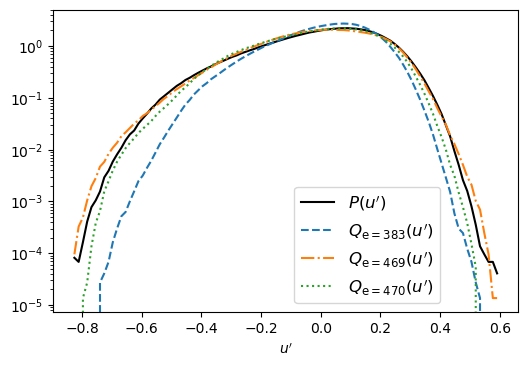

In [5]:
plt.figure(figsize=(6, 4), dpi=100)
plt.yscale("log")
plt.xlabel('$u^\prime$')

plt.plot(bin_edges[0:len(hist_dev)] + 0.5*(bin_edges[1]-bin_edges[0]), hist_dev, '-k', label='$P(u^\prime)$', linewidth=1.5)

fmt = ['--', '-.', ':']
label = ['$Q_{\mathrm{e}=383}(u^\prime)$', '$Q_{\mathrm{e}=469}(u^\prime)$', '$Q_{\mathrm{e}=470}(u^\prime)$']

for i in range(len(gap_dev_pred)):
    plt.plot(bin_edges[0:len(hist)] + 0.5*(bin_edges[1]-bin_edges[0]), hist_dev_pred[i], fmt[i], label=label[i], linewidth=1.5)

plt.legend(loc='lower right', bbox_to_anchor=(0., 0., 0.85, 1.), fontsize='large')

#### *Kullback-Leibler divergence*

In [6]:
EPS = 1.e-12

KLD = [] # KL divergence between P(u') and Q(u')
for i in range(len(gap_dev_pred)):
    KLD.append(np.sum(hist_dev*np.log(hist_dev/(hist_dev_pred[i]+EPS)))*(bin_edges[1]-bin_edges[0]))

print(KLD)

[0.05914733175464362, 0.004287529548275299, 0.009479703931533454]
